# Тут различные эксперименты в плане архитектуры сети

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
import os
from math import floor

from data_generator import DataGenerator
from trainer import Flatten, ModelTrainer

import gc

In [2]:
TEST_DIR_NAME = 'simple_image_classification\\test\\'
MARKUP_FILE_NAME = 'simple_image_classification\\labels_trainval.csv'

TRAIN_RATIO = 0.9
TEST_RATIO = 1 - TRAIN_RATIO
INPUT_SIZE = 224 * 224 * 3
IMAGE_SIZE = (224, 224)
CHANNELS = 3
NUM_CLASSES = 200
MAX_LEN = 10**5

In [3]:
df = pd.read_csv(MARKUP_FILE_NAME)
if len(df) > MAX_LEN:
    print('Обрезаем датасет')
    df = df[:MAX_LEN]
# кол-во классов
print(len(set(list(df['Category'].values))))
border = floor(len(df) * TRAIN_RATIO)
df_train = df[:border]
df_test = df[border:2*border]
    
train_gen = DataGenerator(image_names=df_train['Id'], labels=df_train['Category'])
test_gen = DataGenerator(image_names=df_test['Id'], labels=df_test['Category'])

trainer = ModelTrainer(train_gen, test_gen)

200


In [4]:
def plot_history(train_history, val_history, title='loss'):
    plt.figure()
    plt.title('{}'.format(title))
    plt.plot(train_history, label='train', zorder=1)
    
    points = np.array(val_history)
    
    plt.scatter(points[:, 0], points[:, 1], marker='+', s=180, c='orange', label='val', zorder=2)
    plt.xlabel('train steps')
    
    plt.legend(loc='best')
    plt.grid()

    plt.show()

In [5]:
epochs = 6

In [6]:
model_ind = 0

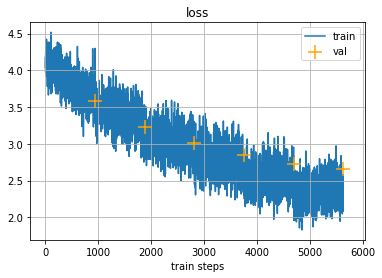

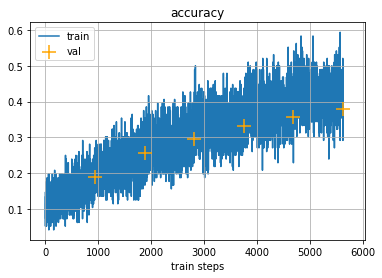

Epoch: 5, val loss: 2.6547623880374167, val accuracy: 0.3794928193092346
Epoch: 5, train loss: 2.3491023053238385, train accuracy: 0.42093104124069214
Epoch time: 1797.7973608970642


In [7]:
model_mn = models.mobilenet_v2(pretrained=False)
model_mn.classifier[1] = nn.Linear(in_features=model_mn.last_channel, out_features=NUM_CLASSES)
model = nn.Sequential(
    model_mn,
    nn.LogSoftmax(dim=-1),
)

trainer.set_model(model)

model=None
gc.collect()
torch.cuda.empty_cache()
trainer.train(n_epochs=epochs, plot_history=plot_history, lr=3e-4, clear_output=clear_output, batch_size=96, cuda=True)
torch.save(trainer.get_model(), model_name)

In [8]:
"""
hidden = 512
filters = 64
kernel=3

model = nn.Sequential(
    nn.Conv2d(in_channels=CHANNELS, out_channels=filters, kernel_size=kernel, stride=1, padding=kernel // 2),
    nn.BatchNorm2d(filters),
    nn.ReLU(),
    nn.Conv2d(in_channels=filters, out_channels=filters, kernel_size=kernel, stride=1, padding=kernel // 2),
    nn.BatchNorm2d(filters),
    nn.ReLU(),
    nn.Conv2d(in_channels=filters, out_channels=2*filters, kernel_size=kernel, stride=2, padding=kernel // 2),
    nn.BatchNorm2d(2*filters),
    nn.ReLU(),
    nn.Conv2d(in_channels=2*filters, out_channels=2*filters, kernel_size=kernel, stride=1, padding=kernel // 2),
    nn.BatchNorm2d(2*filters),
    nn.ReLU(),
    nn.Conv2d(in_channels=2*filters, out_channels=2*filters, kernel_size=kernel, stride=1, padding=kernel // 2),
    #nn.BatchNorm2d(2*filters),
    nn.ReLU(),
    nn.Conv2d(in_channels=2*filters, out_channels=4*filters, kernel_size=kernel, stride=2, padding=kernel // 2),
    #nn.BatchNorm2d(4*filters),
    nn.ReLU(),
    nn.Conv2d(in_channels=4*filters, out_channels=4*filters, kernel_size=kernel, stride=1, padding=kernel // 2),
    #nn.BatchNorm2d(4*filters),
    nn.ReLU(),
    nn.Conv2d(in_channels=4*filters, out_channels=4*filters, kernel_size=kernel, stride=1, padding=kernel // 2),
    #nn.BatchNorm2d(4*filters),
    nn.ReLU(),
    nn.Conv2d(in_channels=4*filters, out_channels=4*filters, kernel_size=kernel, stride=2, padding=kernel // 2),
    #nn.BatchNorm2d(4*filters),
    nn.ReLU(),
    nn.Conv2d(in_channels=4*filters, out_channels=4*filters, kernel_size=kernel, stride=1, padding=kernel // 2),
    #nn.BatchNorm2d(4*filters),
    nn.ReLU(),
    nn.Conv2d(in_channels=4*filters, out_channels=4*filters, kernel_size=kernel, stride=1, padding=kernel // 2),
    #nn.BatchNorm2d(4*filters),
    nn.ReLU(),
    nn.Conv2d(in_channels=4*filters, out_channels=4*filters, kernel_size=kernel, stride=2, padding=kernel // 2),
    nn.BatchNorm2d(4*filters),
    nn.Sigmoid(),
    nn.Conv2d(in_channels=4*filters, out_channels=4*filters, kernel_size=kernel, stride=1, padding=kernel // 2),
    nn.BatchNorm2d(4*filters),
    nn.Sigmoid(),
    Flatten(),
    nn.Linear(64 * filters, hidden),
    nn.Sigmoid(),
    nn.Dropout(0.2),
    nn.Linear(hidden, NUM_CLASSES),
    nn.LogSoftmax(dim=-1),
    )
model_ind += 1
model_name = 'models/model_%04d.mdl' % model_ind
if os.path.exists('models\\model_best_final.mdl'):
    model = torch.load('models\\model_best_final.mdl')
trainer.set_model(model)

model=None
gc.collect()
torch.cuda.empty_cache()
trainer.train(n_epochs=epochs, plot_history=plot_history, lr=1e-3, clear_output=clear_output, batch_size=256)
torch.save(trainer.get_model(), model_name)
"""

"\nhidden = 512\nfilters = 64\nkernel=3\n\nmodel = nn.Sequential(\n    nn.Conv2d(in_channels=CHANNELS, out_channels=filters, kernel_size=kernel, stride=1, padding=kernel // 2),\n    nn.BatchNorm2d(filters),\n    nn.ReLU(),\n    nn.Conv2d(in_channels=filters, out_channels=filters, kernel_size=kernel, stride=1, padding=kernel // 2),\n    nn.BatchNorm2d(filters),\n    nn.ReLU(),\n    nn.Conv2d(in_channels=filters, out_channels=2*filters, kernel_size=kernel, stride=2, padding=kernel // 2),\n    nn.BatchNorm2d(2*filters),\n    nn.ReLU(),\n    nn.Conv2d(in_channels=2*filters, out_channels=2*filters, kernel_size=kernel, stride=1, padding=kernel // 2),\n    nn.BatchNorm2d(2*filters),\n    nn.ReLU(),\n    nn.Conv2d(in_channels=2*filters, out_channels=2*filters, kernel_size=kernel, stride=1, padding=kernel // 2),\n    #nn.BatchNorm2d(2*filters),\n    nn.ReLU(),\n    nn.Conv2d(in_channels=2*filters, out_channels=4*filters, kernel_size=kernel, stride=2, padding=kernel // 2),\n    #nn.BatchNorm2d(4

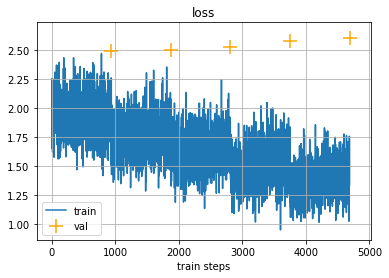

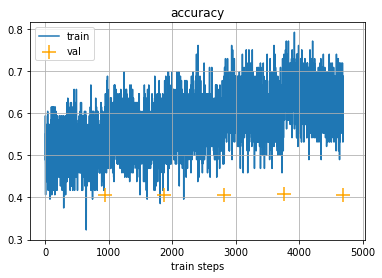

Epoch: 4, val loss: 2.6053001396953106, val accuracy: 0.4056509733200073
Epoch: 4, train loss: 1.3787039953000002, train accuracy: 0.6388259530067444
Epoch time: 1797.569791316986


In [9]:
trainer.train(n_epochs=5, plot_history=plot_history, lr=1e-4, clear_output=clear_output, batch_size=96, cuda=True)
torch.save(trainer.get_model(), model_name)